# Проект продажа компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from scipy import stats as st


## Изучение данных

Откроем файл с данными и изучим общую инфомацию.

In [2]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

### Изменение регистра

Сначала приведем все названия столцов к нижнему регистру

In [4]:
data.columns = [x.lower() for x in data.columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Преобразование данных в нужный тип

Изменим значения в толбце 'year_of_release' на 'int' , так как года записаны в числа с запятой.

In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

### Обработка пропусков

Посчитаем пропуски

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти строки можно удалить , так как они не повлияют на конечный результат исследования.

In [8]:
data.drop(labels=[659,14244], axis = 0, inplace = True)

Посмотрим сколько пропусков в столбце 'year_of_release' по сравнению со всем датафреймом.

In [9]:
data.shape

(16713, 11)

In [10]:
data['year_of_release'].isna().sum()/16713

0.016095255190570215

1.6 % от всего количества строк . Строки  с ропусками в столбце 'year_of_release' можно удалить.

In [11]:
data = data.dropna(subset = ['year_of_release'])

In [12]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Большое количество пропусках в столбцах с оценкой 'critic_score', 'user_score', 'rating'. Скорее всего люди не всегда оценивают игры.

Далее рассмотрим значение 'ttd' в столбце с оценкой пользователей 'user_score' и разберемся ,что это значит.

In [13]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Каких-либо зависимостей не наблюдается. TBD расшифровыается , как 'To Be Determined', что в переводе на русский означает 'предстоит определить'.

Заменим 'ttd' на 'NaN', затем изменим тип данных.

In [14]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [15]:
data['user_score'] = data['user_score'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Снова посчитаем пропуски в столбце 'user_score'

In [16]:
data['user_score'].isna().sum()

8981

### Посичтаем суммарные продажи во всех регионах

Добавим стобец с сумарными продажами во всех регионах.

In [17]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Обработка дубликатов

Теперь посмотрим ,есть ли явные дубликаты.

In [18]:
data.duplicated().sum()

0

Полных дубликатов нет.

Посмотрим на дубликаты в названии игр

In [19]:
data['name'].duplicated().sum()

5018

In [20]:
duplicated = data[data['name'].duplicated()]
duplicated

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Можно заметить , что одна и та же игра может выйти на разных платформах. Так же есть игры , у которых есть несколько частей.

## Исследовательский анализ данных

### Сколько игр выпускалось в разныыые годы

Посмотрим сколько игр выпускалось в разные периоды.

In [21]:
data_year = data.pivot_table(index=['year_of_release'],values=['name'],aggfunc = 'count')
data_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Для наглядности , построим столбчатый график.

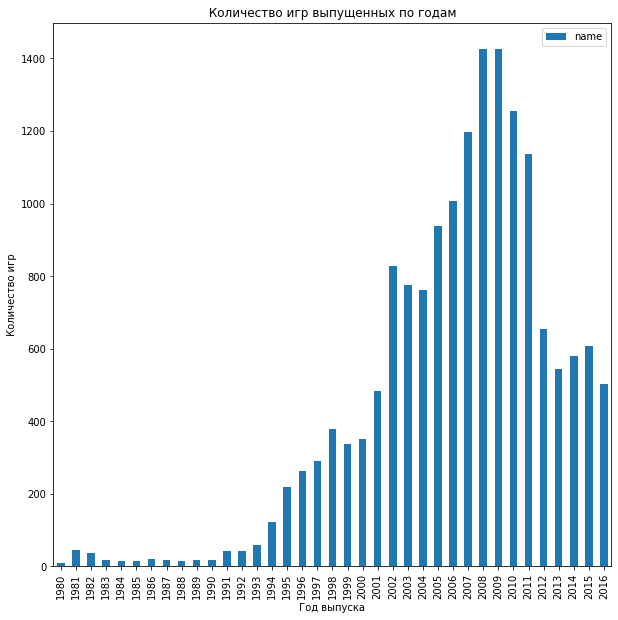

In [22]:
data_year.plot(kind='bar', figsize = (10,10))
plt.ylabel(" Количество игр ")
plt.xlabel(" Год выпуска ")
plt.title(" Количество игр выпущенных по годам ");

Из графика можно сделать вывод, что примерно с 1996 года количество выпущеных игр стало больше. Скорее всего это сввязано с началом эпохи новых технологий. Максимальное количество выпущеных игр приходится на 2008 - 2009 года. затем в 2011 - 2016 годам заметен спад. Количество выпущенных игр приблизительно на уровне 1990х годов.  

### Как менялись продажи в зависимости от платформы

Изучим как менялись продажи в зависимости от платформы.

In [23]:
data_platform = data.pivot_table(index=['platform'],values=['all_sales'],aggfunc = 'sum').sort_values(by='all_sales',ascending = False)
data_platform

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


В таблице можно можно увидеть, что самыми популярными платформами являются PS2 , X360, PS3, Wii, DS, PS.	

Построим распределение по годам для этих платформ.

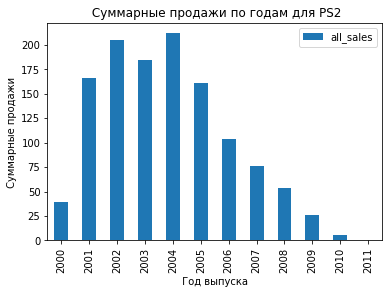

In [24]:
data[data['platform'] == 'PS2'].pivot_table(index='year_of_release',values='all_sales', aggfunc = 'sum').plot(kind='bar')
plt.ylabel(" Суммарные продажи ")
plt.xlabel(" Год выпуска ")
plt.title(" Суммарные продажи по годам для PS2");

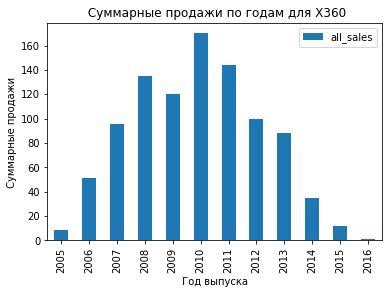

In [25]:
data[data['platform'] == 'X360'].pivot_table(index='year_of_release',values='all_sales', aggfunc = 'sum').plot(kind='bar')
plt.ylabel(" Суммарные продажи ")
plt.xlabel(" Год выпуска ")
plt.title(" Суммарные продажи по годам для X360");

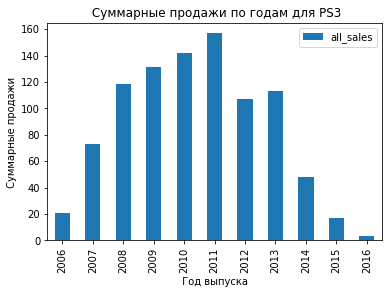

In [26]:
data[data['platform'] == 'PS3'].pivot_table(index='year_of_release',values='all_sales', aggfunc = 'sum').plot(kind='bar')
plt.ylabel(" Суммарные продажи ")
plt.xlabel(" Год выпуска ")
plt.title(" Суммарные продажи по годам для PS3");

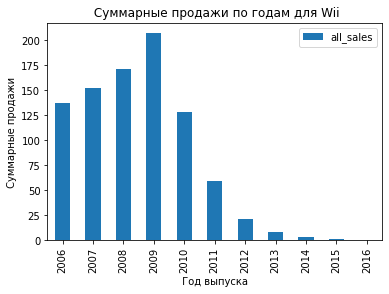

In [27]:
data[data['platform'] == 'Wii'].pivot_table(index='year_of_release',values='all_sales', aggfunc = 'sum').plot(kind='bar')
plt.ylabel(" Суммарные продажи ")
plt.xlabel(" Год выпуска ")
plt.title(" Суммарные продажи по годам для Wii");

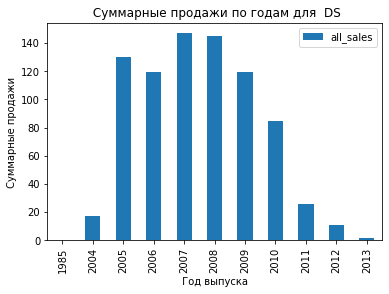

In [28]:
data[data['platform'] == 'DS'].pivot_table(index='year_of_release',values='all_sales', aggfunc = 'sum').plot(kind='bar')
plt.ylabel(" Суммарные продажи ")
plt.xlabel(" Год выпуска ")
plt.title(" Суммарные продажи по годам для  DS");

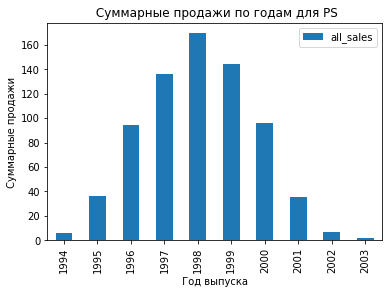

In [29]:
data[data['platform'] == 'PS'].pivot_table(index='year_of_release',values='all_sales', aggfunc = 'sum').plot(kind='bar')
plt.ylabel(" Суммарные продажи ")
plt.xlabel(" Год выпуска ")
plt.title(" Суммарные продажи по годам для PS");

Проанализировав эти графики , можно предположить, что платформы PS, PS2, DS, а так же Wii со временем потеряли свою популярноть , в виду изобретения новых платформ. Так же можно заметить , что на рынке платформ, появилась новая приставка PS3 ,которая завоевала популярность.

Проходит приблизительно 10 лет с выпуска платформы до ее потери популярности.


### Выбор актуального периода и определение лидеров продаж по платформе

Определим актуальный период в 3 года, то есть с 2013 - 2016.

In [30]:
actual_period = data[data['year_of_release'] >= 2013]
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Посмотрим какие платформы есть в этом периоде

In [31]:
actual_period['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

В список попали также платформы, не существующие к 2016 году (PSP, PS2, DS ). Учитывая, что цель анализа - выявить потенциально популярные платформы, их нужно выкинуть.

In [32]:
actual_platform = ['Wii', 'X360', 'PS3', 'PSV', 'PS4', 'WiiU', 'XOne', 'PC', '3DS']
actual_period = actual_period[actual_period['platform'].isin(actual_platform)]
actual_period.groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.040,0.090,0.280,14.60
PC,189.0,0.208624,0.352304,0.01,0.030,0.080,0.230,3.05
PS3,345.0,0.525884,1.451939,0.01,0.040,0.150,0.510,21.05
PS4,392.0,0.801378,1.609456,0.01,0.060,0.200,0.730,14.63
PSV,358.0,0.092151,0.153816,0.01,0.020,0.040,0.110,1.96
Wii,23.0,0.593913,0.915432,0.01,0.045,0.180,0.755,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.060,0.200,0.595,7.09
X360,186.0,0.735484,1.663275,0.01,0.080,0.265,0.795,16.27
XOne,247.0,0.645020,1.036139,0.01,0.060,0.220,0.685,7.39


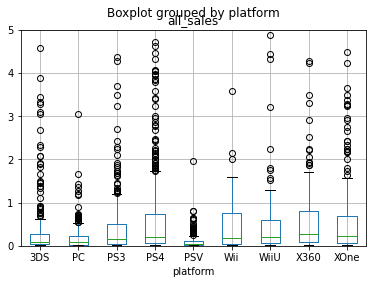

In [33]:
actual_period.boxplot(column='all_sales', by='platform'); 
plt.ylim(0,5)
plt.show()

Итак , можно сделать вывод, что успешнее всего продажи на платформах X360, PS3, XOne и WiiU.

### Влияние на продажи отзывов пользователей и критиков, внутри одной платформы

**Начнем с платформы X360**

In [34]:
x360 = data[data['platform']=='X360']
x360['user_score'].corr(x360['all_sales'])

0.11418661214018049

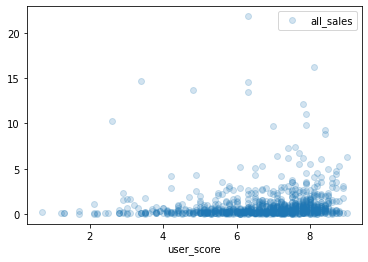

In [35]:
x360.plot(x='user_score', y='all_sales',style='o', alpha= 0.2);

In [36]:
x360['critic_score'].corr(x360['all_sales'])

0.39286589254006954

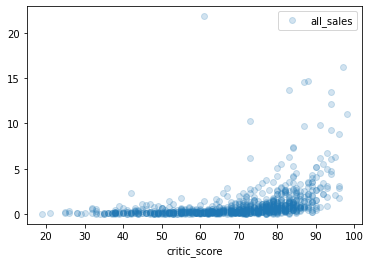

In [37]:
x360.plot(x='critic_score', y='all_sales',style='o', alpha= 0.2);

Как можно заметить, отзывы критиков больше вляяют на продажи игр на платформе X360, чем отзывы пользователей.

**Платформа Wii**

In [38]:
Wii = data[data['platform']=='Wii']
Wii['user_score'].corr(Wii['all_sales'])

0.11283121360773772

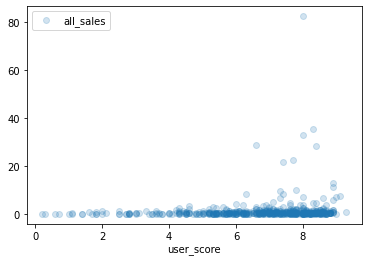

In [39]:
Wii.plot(x='user_score', y='all_sales',style='o', alpha= 0.2);

In [40]:
Wii['critic_score'].corr(Wii['all_sales'])

0.17790728577594908

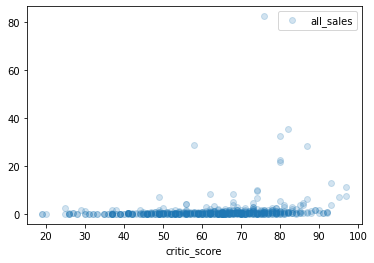

In [41]:
Wii.plot(x='critic_score', y='all_sales',style='o', alpha= 0.2);

Можно также заметить , что зависимость между отзывами критиков и всеми продажами сильнее, чем между отзывами пользователей и всеми продажами. 

**Платфоорма PS3**

In [42]:
ps3 = data[data['platform'] == 'PS3']
ps3['user_score'].corr(ps3['all_sales'])

0.12841562938563006

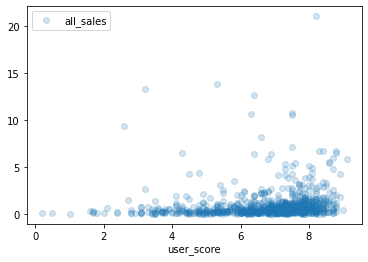

In [43]:
ps3.plot(x='user_score', y='all_sales',style='o', alpha= 0.2);

In [44]:
ps3['critic_score'].corr(ps3['all_sales'])

0.4327589578997135

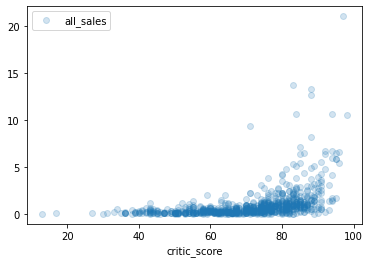

In [45]:
ps3.plot(x='critic_score', y='all_sales',style='o', alpha= 0.2);

Для этой платформы зависимость более заметна. Так же можно отметить, что зависимость оценки критиков от продаж, сильнее ,чем зависимость оценки пользователей от продаж.

**Платформа PSV**

In [46]:
psv = data[data['platform'] == 'PSV']
psv['user_score'].corr(psv['all_sales'])

0.0134887568358865

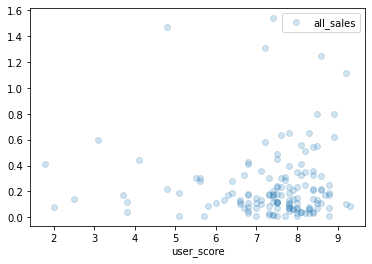

In [47]:
psv.plot(x='user_score', y = 'all_sales', style='o', alpha=0.2);

In [48]:
psv['critic_score'].corr(psv['all_sales'])

0.13176292727608935

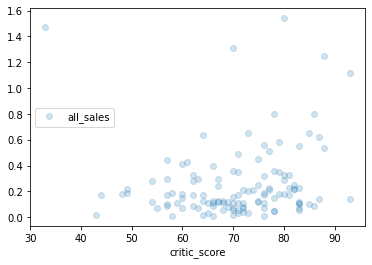

In [49]:
psv.plot(x='critic_score', y = 'all_sales', style='o', alpha=0.2);

Можно заметить,что зависимости между оценкой пользователей и общими продажами практически нет. Так же почти нет зависимости между оенкой критиков и общими продажами.

**Платформа PS4**

In [50]:
ps4 = data[data['platform'] == 'PS4']
ps4['user_score'].corr(ps4['all_sales'])

-0.031957110204556376

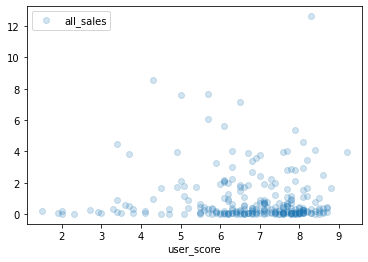

In [51]:
ps4.plot(x='user_score', y = 'all_sales', style='o', alpha=0.2);

In [52]:
ps4['critic_score'].corr(ps4['all_sales'])

0.40656790206178095

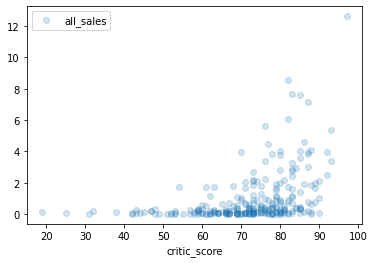

In [53]:
ps4.plot(x='critic_score', y = 'all_sales', style='o', alpha=0.2);

На платформе PS4 можно заметить, что между оценкой пользователей и общими продажами существует отрицательная корреляция , то есть обратная зависмость. При этом наблюдается зависимость между оценкой критиков и общими продажами.

**Платформа WiiU**

In [54]:
wiiu = data[data['platform'] == 'WiiU']
wiiu['user_score'].corr(wiiu['all_sales'])

0.4002190202148617

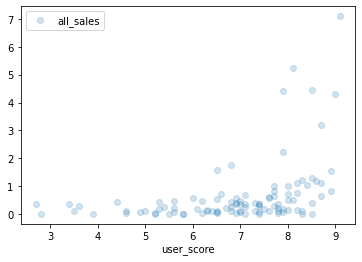

In [55]:
wiiu.plot(x='user_score', y = 'all_sales', style='o', alpha=0.2);

In [56]:
wiiu['critic_score'].corr(wiiu['all_sales'])

0.34837976012017485

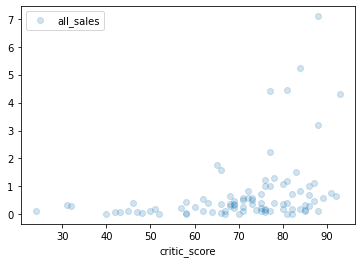

In [57]:
wiiu.plot(x='critic_score', y = 'all_sales', style='o', alpha=0.2);

Здесь можно отметить зависимость сильнее , чем на предыдущих платформах. Продажи зависят от оценки пользователей чуть больше, чем от оценки критиков.

**Платформа XOne**

In [58]:
xone = data[data['platform'] == 'XOne']
xone['user_score'].corr(xone['all_sales'])

-0.06892505328279414

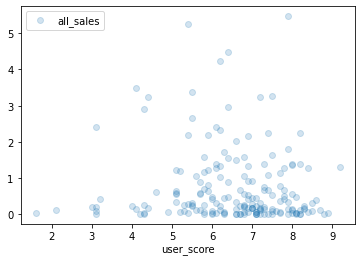

In [59]:
xone.plot(x='user_score', y = 'all_sales', style='o', alpha=0.2);

In [60]:
xone['critic_score'].corr(xone['all_sales'])

0.4169983280084017

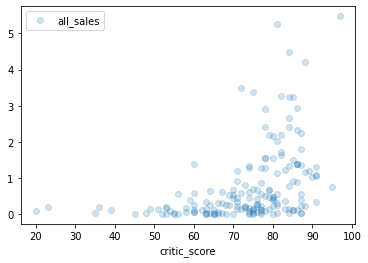

In [61]:
xone.plot(x='critic_score', y = 'all_sales', style='o', alpha=0.2);

На платформе XOne наблюдается отрицательная корреляция между оценкой пользователей и общими продажами. При этом заметна зависимость между оценкой критиков от общих продаж.

**Платформа PC**

In [62]:
pc = data[data['platform'] == 'PC']
pc['user_score'].corr(pc['all_sales'])

0.012904741611451175

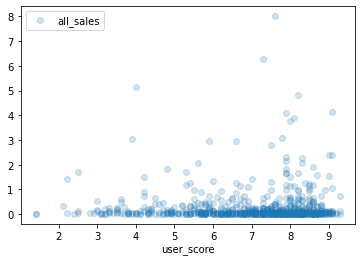

In [63]:
pc.plot(x='user_score', y = 'all_sales', style='o', alpha=0.2);

In [64]:
pc['critic_score'].corr(pc['all_sales'])

0.257394718400985

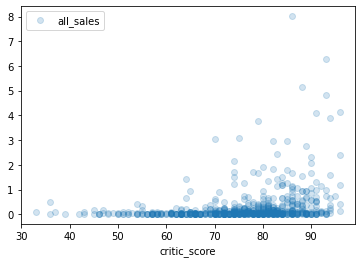

In [65]:
pc.plot(x='critic_score', y = 'all_sales', style='o', alpha=0.2);

На платформе PC почти нет зависимости между оценкой пользоателей и общими продажами. Чуть больше зависимость между оценкой критиков и общими продажами.

**Платформа 3DS**

In [66]:
ds = data[data['platform'] == '3DS']
ds['user_score'].corr(ds['all_sales'])

0.22207843643390882

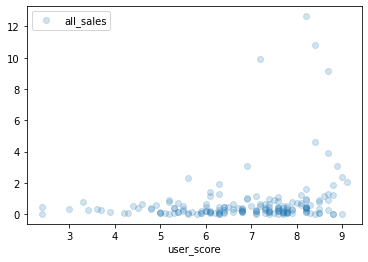

In [67]:
ds.plot(x='user_score', y = 'all_sales', style='o', alpha=0.2);

In [68]:
ds['critic_score'].corr(ds['all_sales'])

0.3487397305984834

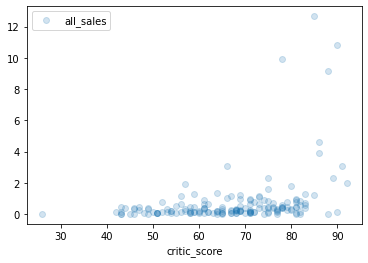

In [69]:
ds.plot(x='critic_score', y = 'all_sales', style='o', alpha=0.2);

На платформе 3DS отзывы критиков влияют на продажи чуть больше , чем оценка пользователей.

В целом можно сказать, что корреляция проявлена слабо между оценкой пользователей и ощими продажами, так же как и между оценкой критиков и общми продажами. Но стоит отметить , что оцнка критиков в целом чуть больше влияют на общие продажи.

### Общее распределение игр по жанрам

In [70]:
genre = actual_period.pivot_table(index = 'genre', values = 'all_sales', aggfunc = 'mean' ).sort_values(by='all_sales',ascending = False)
genre

,all_sales
genre,
Shooter,1.245882
Sports,0.720817
Platform,0.582500
Role-Playing,0.508281
Racing,0.469294
Fighting,0.446709
Misc,0.428562
Action,0.426210
Simulation,0.353279


Как видно из таблицы больше всего продаж , в жанре 'шутер' , меньше всего продаж в жанре 'приключения', 'пазлы' и 'стратегии'.

## Портрет пользователя для каждого региона (NA, EU, JP)

### Самые популярные платформы  

**Топ-5 платформы в Северной Америке**

In [71]:
na_platform = actual_period.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending = False)
na_platform.head()

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


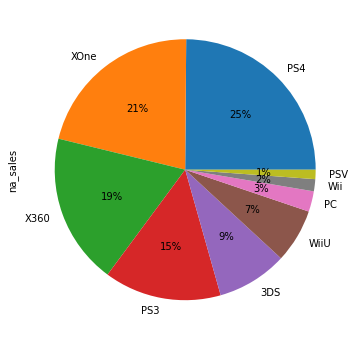

In [72]:
na_platform.plot(y='na_sales',kind='pie',figsize = (6,6), legend = False, autopct='%1.0f%%',normalize=True);

Отметим , что в Северной Америке игры продаются лучше всего на платформах PS4 и XOne. Меньше всего продаж на платформах PSV ,а также Wii и PC.

**Топ-5 платформ в Европе**

In [73]:
eu_platform = actual_period.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending = False)
eu_platform.head()

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


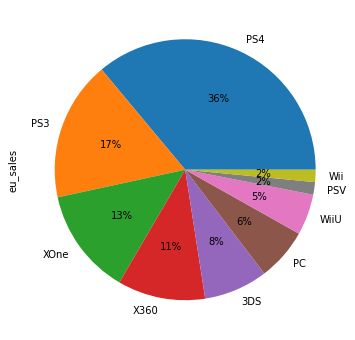

In [74]:
eu_platform.plot(y='eu_sales',kind='pie',figsize = (6,6), legend = False, autopct='%1.0f%%',normalize=True);

Можно заметить, что в Европе больше всего продаж на платформе PS4 . Меньше всего на платформе PSV и Wii.

**Топ-5 платформ в Японии**

In [75]:
jp_platform = actual_period.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending = False)
jp_platform.head()

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


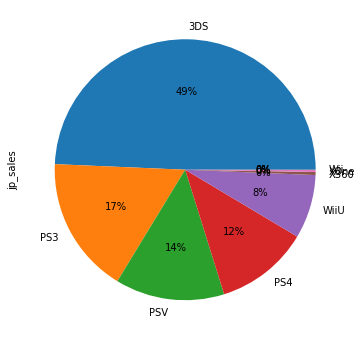

In [76]:
jp_platform.plot(y='jp_sales',kind='pie',figsize = (6,6), legend = False, autopct='%1.0f%%',normalize=True);

Судя по круговой диаграмме в Японии игры на платформе 3DS продаются гораздо лучше других, причем с огрмным отрывом. Меньше всего продаются игры на платформах XOne, X360, PC.

### Самые популярные жанры

**Топ-5 жанров в Северной Америке**

In [77]:
na_genre = actual_period.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by='na_sales', ascending = False)
na_genre.head()

,na_sales
genre,
Action,125.83
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.46


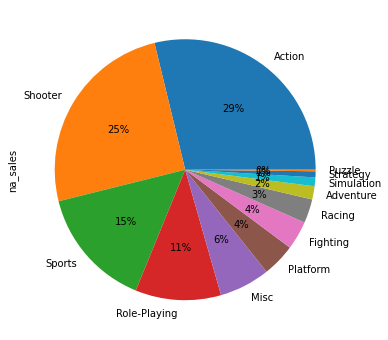

In [78]:
na_genre.plot(y='na_sales',kind='pie',figsize = (6,6), legend = False, autopct='%1.0f%%',normalize=True);

Заметим , что в Северной Америке самым популярным жанром для игры стал 'экшен'. Меньше всего продали игр с жанрами 'приключения' , 'пазлы' , 'стратегии' , 'симуляиции' .

**Топ-5 жанров в Европе**

In [79]:
eu_genre = actual_period.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by='eu_sales', ascending = False)
eu_genre.head()

,eu_sales
genre,
Action,117.87
Shooter,87.86
Sports,60.34
Role-Playing,36.97
Racing,20.19


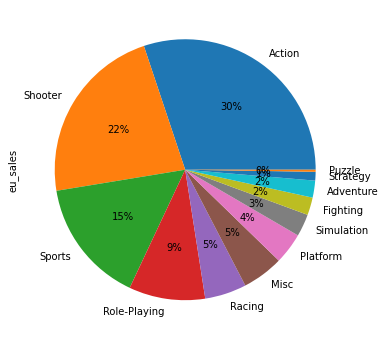

In [80]:
eu_genre.plot(y='eu_sales',kind='pie',figsize = (6,6), legend = False, autopct='%1.0f%%',normalize=True);

Отметим, что в Европе, так же как и в Северной Америке самым популярным жанром для игр стал 'экшен'. Самым не продоваемым жанром стали 'пазлы' и 'стратегии'.

**Топ-5 жанров в Японии**

In [81]:
jp_genre = actual_period.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by='jp_sales', ascending = False)
jp_genre.head()

,jp_sales
genre,
Role-Playing,50.01
Action,39.65
Misc,9.03
Fighting,7.63
Shooter,6.61


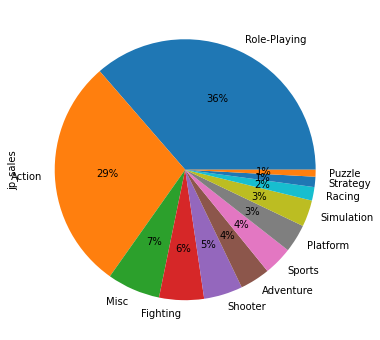

In [82]:
jp_genre.plot(y='jp_sales',kind='pie',figsize = (6,6), legend = False, autopct='%1.0f%%',normalize=True);

В Японии ситуация не такая как в Северной Америке и Европе. Самым продоваемым жанром для игр является 'ролевые игры'. Меньше всего продаж игр с жанром 'пазл' и 'стратегии'.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [83]:
data['rating']. unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заполним пропуски

In [84]:
actual_period['rating']=actual_period['rating'].fillna('Unknown')
actual_period.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1168
user_score          969
rating                0
all_sales             0
dtype: int64

**В Северной Америке**

In [85]:
na_esrb = actual_period.pivot_table(index = 'rating',values = 'na_sales',aggfunc = 'mean')
na_esrb

,na_sales
rating,
E,0.266689
E10+,0.216080
M,0.447724
T,0.149970
Unknown,0.097892


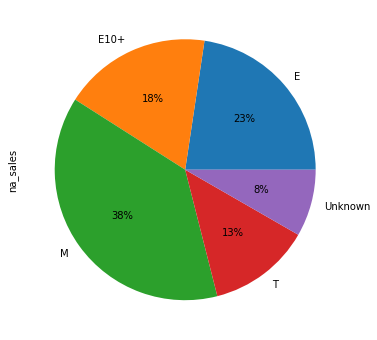

In [86]:
na_esrb.plot(y = 'na_sales',kind='pie',figsize = (6,6), legend = False, autopct='%1.0f%%',normalize=True);

В Северной Америке больше всего продаж игр с рейтингом 'М'(для взрослых). У 8% игр рейтинг не определен. 23% игр с рейтингом 'E'(для всех)

**В Европе**

In [87]:
eu_esrb = actual_period.pivot_table(index = 'rating',values = 'eu_sales',aggfunc = 'mean')
eu_esrb

,eu_sales
rating,
E,0.279730
E10+,0.170120
M,0.393821
T,0.126355
Unknown,0.086290


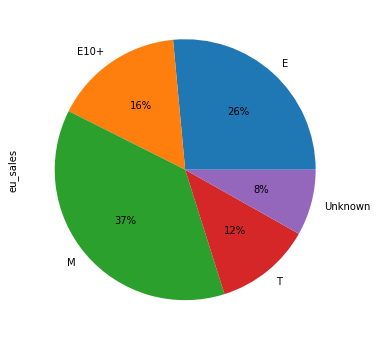

In [88]:
eu_esrb.plot(y='eu_sales',kind='pie',figsize = (6,6), legend = False, autopct='%1.0f%%',normalize=True);

В Европе больше всего игр , а точнее 37% с рейтингом 'М'(для взрослых). У 8% игр рейтинг не определен. 26% игр с рейтингом 'E'(для всех). 16% игр с рейтингом 

**В Японии**

In [89]:
jp_esrb = actual_period.pivot_table(index = 'rating',values = 'jp_sales',aggfunc = 'mean')
jp_esrb

,jp_sales
rating,
E,0.050676
E10+,0.023560
M,0.038238
T,0.061566
Unknown,0.090066


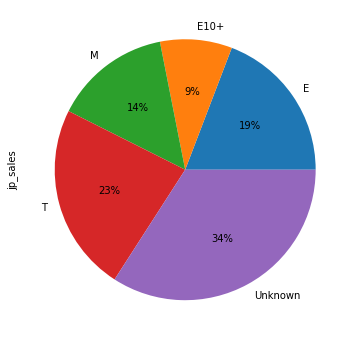

In [90]:
jp_esrb.plot(y = 'jp_sales',kind='pie',figsize = (6,6), legend = False, autopct='%1.0f%%',normalize=True);

В Японии больше всего игр с неопределенным рейтингом - 34%. У 23% игр рейтинг 'T'(для подростков). 19% игр с рейтингом 'E'(для всех). 14% игр с рейтингом 'М'(для взрослых). 9% игр с рейтингом 'E10+'(для всех от 10 и старше).

## Проверка гипотез

**Гипотеза №1** : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Гипотеза №2** : Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Мы имеем независимые выборки ,поэтому для двух гипотез используем t-критерий Стьюдента. Возьмем alpha=0.05

Чтобы проверить **Гипотезу №1**, сформулируем нулевую и альтернативную гипотезу.

Нулевая гипотеза **H0**: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза **H1**: средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

In [91]:
xone_actual = data[(data['platform'] == 'XOne') & (data['year_of_release'] >= 2013)]['user_score']
pc_actual = data[(data['platform'] == 'PC') & (data['year_of_release'] >= 2013)]['user_score']
alpha = 0.05 
results = st.ttest_ind(xone_actual.dropna(), pc_actual.dropna() , equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha :
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Проверяем **Гипотезу №2**, так же формулируем нулевую и альтернативную гипотезу.

Нулевая гипотеза **H0**: средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза **H1**: средние пользоввательские рейтинги жанров Action и Sports разные.

In [92]:
action_actual = data[(data['genre'] == 'Action') & (data['year_of_release'] >= 2013)]['user_score']
sports_actual = data[(data['genre'] == 'Sports') & (data['year_of_release'] >= 2013)]['user_score']
alpha = 0.05
results = st.ttest_ind(action_actual.dropna(), sports_actual.dropna() , equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha :
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Действительно средние пользовательские рейтинги платформ Xbox One и PC оказались одинаковые. А средние пользовательские рейтинги жанров Action и Sports не равны.

## Общий вывод


В данном проекте мы работали с большим количеством данных о продаже компьтерных игр, которые включают в себя : год выхода игры, оценки критиков, оценки пользователей, рейтинг, продажи в разных регионах мира (NA,EU,JP), платформа игры и жанр игры.


Далее мы начали подготовку данных. Сначала изменили названия всех столбцов на нижний регистр. Затем изменили тип данных ,там где это нужно. Изучив общую информацию о продаже игр , увидели в некоторых столбцах пропуски. В столбцах 'name', 'genre' было всего по 2 пропуска,которые не влияли на общий анализ. Поэтому эти строки с проопуском мы удалили. Такие пропуски обусловлены человеческим фактором. Так же обнаружили 267 пропусков в столбце 'year_of_release', от общего количества строк это всего 1.6% , поэтому эти строки мы так же удалили. Большое количество пропусков в столбцах с оценкой 'critic_score', 'user_score', 'rating'. Скорее всего пользователеи и критики не всегда оценивают игры.  В столбце 'user_score' заметили аббревиатуру 'tbd', что означает 'To Be Determined', что в переводе на русском 'предстоит определить'. Такие значения заменили на 'NaN'. Потом добавили столбец со суммарными продажами во всех регионах.

Следущим шагом мы провели исследовательский анализ данных. Узнали сколько игр выпускалось в разные годы ,и заметили,что примерно с 1996 года количество выпущеных игр стало больше. Скорее всего это связано с началом эпохи новых технологий. Максимальное количество выпущеных игр приходится на 2008 - 2009 года. Затем в 2011 - 2016 годам заметен спад. Количество выпущенных игр в 2015-2016 годах приблизительно на уровне 1990х годов. Изучили как менялись продажи в зависимости от платформы. Самыми популярными платформами оказались PS2 , X360, PS3, Wii, DS, PS. Платформы PS, PS2, DS, а так же Wii со временем потеряли свою популярноть , в виду изобретения новых платформ. Так же можно заметить , что на рынке платформ, появилась новая приставка PS3 ,которая завоевала популярность. Проходит приблизительно 10 лет с выпуска платформы до ее потери популярности.

Определили актуальный период 2013-2016 года. В эти года лидерами по продажам стали X360, PS3, XOne и WiiU. Определили влияние на продажи отзывов пользователец и критиков, внутри одной платформы. В целом можно сказать, что корреляция проявлена слабо между оценкой пользователей и общими продажами, так же как и между оценкой критиков и общми продажами. Но стоит отметить , что оцнка критиков в целом чуть больше влияют на общие продажи. Больше всего продаж , в жанре 'шутер' , меньше всего продаж в жанре 'приключения', 'пазлы' и 'стратегии'.

Самыми популярными платформами являются X360, PS4 и PS3 и жанры платформер и шутер - везде, кроме Японии. Для Японии самыми популярными стали платформы 3DS и также WiiU, а самыми популярными жанрами - ролевые и платформеры.
Лучше всего продаются игры с рейтингом "для всех". В Японии на втором месте игры с рейтингом "для тинейджеров", в других регионах (включая Европу и Северную Америку) предпочитают рейтинг "только для взрослых".
Во всех регионах хуже всего продаются игры жанра приключения и игры с рейтингом "для детей младшего возраста"
Больше всего на игры тратят в Северной Америке. На втором месте Европа, на третьея - Япония и другие регионы.
Лучше всего игры без рейтинга продаются в Японии, хуже всего - в Северной Америке. Возможно, связано с тем, что ERSB - негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде, и связь, скорее, обратная - организация быстрее оценивает те игры, которые стали популярными в США и Канаде.



Далее мы проверили 2 гипотезы: 

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

2.  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Обе гипотезы подтверждены. В первом случае оказалось , что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Во втором случае отвергнули нулевую гипотезу и получилось , что средние пользовательские рейтинги жанров Action и Sports разные.